In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import statsmodels.formula.api as smf
from sklearn.linear_model import  LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
final = pd.read_csv('Final.csv', index_col=0)
final

,Member,Member Code,Year,Fund,Real GDP growth (Annual percent change),Food Supply (kcal/capita/day),Dis No,Total PRG Credit Outstanding,Current Account Balance,Capital Account Balance,Financial Account Balance,Reserves
0,Afghanistan,AFG,2008,1,3.9,2041,4,"58,400,000",-238.4,"1,081.60",-490.1,"1,377.50"
1,Afghanistan,AFG,2009,1,20.6,2081,5,"69,700,000",277.6275862,1281.891256,-261.1222985,920.3427757
2,Afghanistan,AFG,2010,1,8.4,2170,5,"75,350,000",-577.7082068,1896.575468,86.80272043,1016.877189
3,Afghanistan,AFG,2011,1,6.5,2152,4,"87,350,000",-2246.921171,1900.911392,285.2644797,1055.621138
4,Afghanistan,AFG,2012,0,14.0,2159,11,"96,900,000",-5150.161881,2434.309716,212.9535566,688.2023226
...,...,...,...,...,...,...,...,...,...,...,...,...
1822,Zimbabwe,ZWE,2015,0,1.8,1919,1,"62,484,153",-1596.693262,398.4,-1223.425377,-50.99289037
1823,Zimbabwe,ZWE,2016,0,0.5,1957,1,0,-697.4743268,242.3,-887.1660917,58.3535646
1824,Zimbabwe,ZWE,2017,0,5.0,1862,2,0,-271.2867206,223.7254951,-569.107468,-568.3183774
1825,Zimbabwe,ZWE,2018,0,4.7,1875,1,0,-1379.721611,231.3916851,-972.7631769,-90.91540088


In [ ]:
final['Total PRG Credit Outstanding'] = final['Total PRG Credit Outstanding'].str.replace(',', '').astype(int)
final['Current Account Balance'] = final['Current Account Balance'].str.replace(',', '').astype(float)
final['Capital Account Balance'] = final['Capital Account Balance'].str.replace(',', '').astype(float)
final['Financial Account Balance'] = final['Financial Account Balance'].str.replace(',', '').astype(float)
final['Reserves'] = final['Reserves'].str.replace(',', '').astype(float)

In [ ]:
final_train = final[final['Year'] < 2010]
final_test = final[final['Year'] >= 2010]

In [ ]:
final_train = final_train.drop(columns=['Member', 'Member Code', 'Year'], axis=1)
final_test = final_test.drop(columns=['Member', 'Member Code', 'Year'], axis=1)

In [ ]:
X_train = final_train.drop('Fund', axis=1)
y_train = final_train['Fund']
X_test = final_test.drop('Fund', axis=1)
y_test = final_test['Fund']

In [ ]:
# Returns the test set accuracy, TPR, and FPR
def perf(y_pred):
    cm = confusion_matrix(y_test, y_pred)
    acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
    TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
    FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
    return acc, TPR, FPR

# Baseline Model

In [ ]:
baseline_true = sum(y_test)
baseline_false = len(y_test) - baseline_true
baseline_true > baseline_false

False

In [ ]:
acc, TPR, FPR = perf(np.zeros(shape=len(y_test)))
print('Accuracy =', acc)
print('TPR =', TPR)
print('FPR =', FPR)

Accuracy = 0.6296875
TPR = 0.0
FPR = 0.0


# Logistic Regression

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

We first carry out P-value analysis and VIF analysis to examine the collinearity of features we have. We imported variance_inflation_factor from statsmodels.stats.outliers_influence to calculate VIF and OLS from statsmodels.api to calculate P-value. Here are the results. 

In [ ]:
model = sm.OLS(y_train,X_train)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Fund   R-squared (uncentered):                   0.470
Model:                            OLS   Adj. R-squared (uncentered):              0.466
Method:                 Least Squares   F-statistic:                              130.4
Date:                Fri, 16 Dec 2022   Prob (F-statistic):                   1.77e-156
Time:                        07:04:10   Log-Likelihood:                         -826.10
No. Observations:                1187   AIC:                                      1668.
Df Residuals:                    1179   BIC:                                      1709.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Real GDP growth (Annual percent change)     0.0061      0.003      2.091      0.037       0.000       0.012
Food Supply (kcal/capita/day)               0.0001   8.96e-06     16.079      0.000       0.000       0.000
Dis No                                      0.0144      0.008      1.781      0.075      -0.001       0.030
Total PRG Credit Outstanding             7.226e-10   1.29e-10      5.598      0.000    4.69e-10    9.76e-10
Current Account Balance                    -0.0001   5.03e-05     -2.603      0.009      -0.000   -3.22e-05
Capital Account Balance                      5e-05   7.08e-05      0.706      0.480   -8.89e-05       0.000
Financial Account Balance                   0.0002   5.19e-05      3.152      0.002    6.17e-05       0.000
Reserves                                 9.365e-05   5.76e-05      1.627      0.104   -1.93e-05       0.000
==============================================================================
Omnibus:                     6223.809   Durbin-Watson:                   1.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.436
Skew:                           0.163   Prob(JB):                     2.36e-30
Kurtosis:                       1.371   Cond. No.                     8.15e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['index'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif
vif = calculate_vif(X_train)
vif

,index,VIF
0,Real GDP growth (Annual percent change),1.684739
1,Food Supply (kcal/capita/day),2.170171
2,Dis No,1.988871
3,Total PRG Credit Outstanding,1.692985
4,Current Account Balance,15.282874
5,Capital Account Balance,2.208237
6,Financial Account Balance,12.036234
7,Reserves,4.988260


However, we find that the VIF value for “Current Account balance” and  “Financial Account Balance” is very high, which indicates that there is a collinearity in these features, so we first drop “Current Account Balance”. After that, all the VIF become less than 5 but the p-value for “Reserves” is still high, indicating statistically insignificant, so we then drop “Reserves” and retrain the model.

New model after dropping

In [ ]:
X_train1 = final_train.drop(['Fund',"Current Account Balance","Reserves"], axis=1)
X_test1 = final_test.drop(['Fund',"Current Account Balance","Reserves"], axis=1)

In [ ]:
model1 = sm.OLS(y_train,X_train1)
model1_fit = model1.fit()
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Fund   R-squared (uncentered):                   0.465
Model:                            OLS   Adj. R-squared (uncentered):              0.463
Method:                 Least Squares   F-statistic:                              171.4
Date:                Fri, 16 Dec 2022   Prob (F-statistic):                   8.70e-157
Time:                        07:04:22   Log-Likelihood:                         -830.60
No. Observations:                1187   AIC:                                      1673.
Df Residuals:                    1181   BIC:                                      1704.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Real GDP growth (Annual percent change)     0.0055      0.003      1.897      0.058      -0.000       0.011
Food Supply (kcal/capita/day)               0.0001   8.92e-06     16.372      0.000       0.000       0.000
Dis No                                      0.0143      0.008      1.767      0.077      -0.002       0.030
Total PRG Credit Outstanding             7.137e-10   1.29e-10      5.517      0.000     4.6e-10    9.67e-10
Capital Account Balance                     0.0002   5.19e-05      3.036      0.002    5.57e-05       0.000
Financial Account Balance                 3.68e-05   1.63e-05      2.252      0.025    4.73e-06    6.89e-05
==============================================================================
Omnibus:                     5847.838   Durbin-Watson:                   1.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.378
Skew:                           0.176   Prob(JB):                     4.45e-32
Kurtosis:                       1.328   Cond. No.                     8.14e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.14e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
vif = calculate_vif(X_train1)
vif

,index,VIF
0,Real GDP growth (Annual percent change),1.675844
1,Food Supply (kcal/capita/day),2.140101
2,Dis No,1.981232
3,Total PRG Credit Outstanding,1.689845
4,Capital Account Balance,1.180475
5,Financial Account Balance,1.188072


We built a logistic regression model to predict whether or not a country would receive funding based on certain features. This is because logistic regression is an efficient binary classification model. We imported the LogisticRegression class from the sklearn.linear_model module and used StandardScaler from the sklearn.preprocessing module to normalize our training data (X_train) and transform the test data (X_test). This helped increase the speed of our model training and improve its performance. After conducting the prediction with our logistic regression model, we set the positive threshold to 0.5, which transforms the probabilities output by the model into either positive or negative predictions. Finally, we calculated several performance metrics to evaluate our model. These included accuracy (0.665625), true positive rate (0.40084), and false positive rate (0.17866). We also plotted an ROC curve and compared it with a naive baseline. Our logistic regression model had an AUC of 0.703, indicating that it is capable of effectively distinguishing between positive and negative samples.


In [ ]:
std = StandardScaler()
X_train_std1 = std.fit_transform(X_train1)
X_test_std1 = std.transform(X_test1)

lr = LogisticRegression()
lr.fit(X_train_std1, y_train)

y_prob_lr = lr.predict_proba(X_test_std1)
y_pred_lr = [1 if x > 0.5 else 0 for x in y_prob_lr[:,1]]

acc, TPR, FPR = perf(y_pred_lr)
print('Accuracy =', acc)
print('TPR =', TPR)
print('FPR =', FPR)

Accuracy = 0.665625
TPR = 0.4008438818565401
FPR = 0.17866004962779156


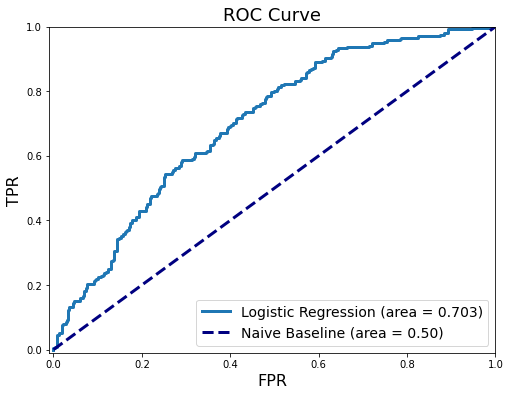

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob_lr[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.00])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

# LDA

In [ ]:
lda = LinearDiscriminantAnalysis()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
lda.fit(X_train_std, y_train)

y_prob_lda = lda.predict_proba(X_test_std)
y_pred_lda = [1 if x > 0.5 else 0 for x in y_prob_lda[:,1]]

acc, TPR, FPR = perf(y_pred_lda)
print('Accuracy =', acc)
print('TPR =', TPR)
print('FPR =', FPR)

Accuracy = 0.6515625
TPR = 0.3924050632911392
FPR = 0.19602977667493796


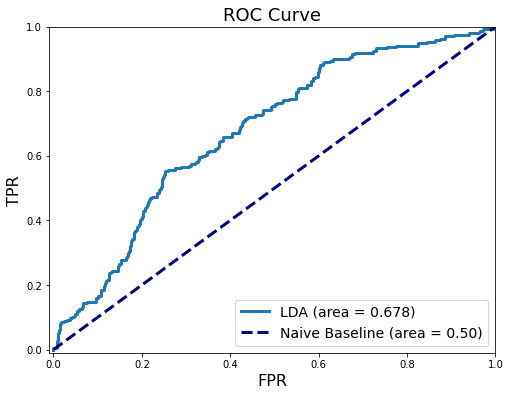

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob_lda[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.00])
plt.plot(fpr, tpr, lw=3, label='LDA (area = {:0.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

Then, we decided to try out an LDA model, so we imported LinearDiscriminantAnalysis from sklearn.discriminant_analysis. We fitted it using the standardized X_train and the original y_train data and used it to predict test set probabilities using the standardized X_test data. Then, we calculated the corresponding predictions by using a classification threshold of 0.5 to maximize accuracy. After that, we examined the model’s performance and found that the accuracy is 0.6515625, TPR is 0.3924050632911392, and FPR is 0.19602977667493796. Lastly, we generated a ROC curve to visualize the tradeoffs between the TPR and FPR. We also calculated that the AUC was 0.6780 to examine the model’s performance across all possible thresholds.

# CART

In [ ]:
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),"random_state":[88]}

dtc = DecisionTreeClassifier()
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, scoring='accuracy', verbose=1)
dtc_cv.fit(X_train, y_train)

Fitting 5 folds for each of 201 candidates, totalling 1005 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.0205, 0.0...
       0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795,
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'random_state': [88]},
             scoring='accuracy', verb

In [ ]:
ccp = dtc_cv.best_params_
ccp

{'ccp_alpha': 0.0055, 'random_state': 88}

Node count = 9


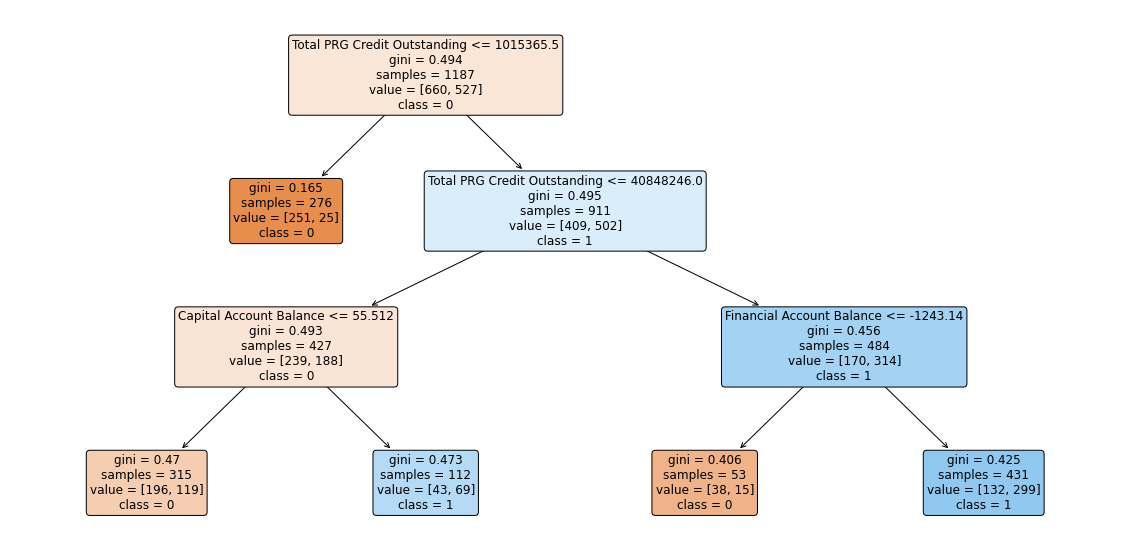

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
print('Node count =', dtc_cv.best_estimator_.tree_.node_count)

plt.figure(figsize=(20,10))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

In [ ]:
acc, TPR, FPR = perf(dtc_cv.best_estimator_.predict(X_test))
print('Accuracy =', acc)
print('TPR =', TPR)
print('FPR =', FPR)

Accuracy = 0.64375
TPR = 0.6497890295358649
FPR = 0.3598014888337469


To better improve our model, we then constructed a Decision Tree Classifier model. We did cross-validation by using the default value defined in GridSearchCV function with a value of 5, thus performing a 5-fold cross-validation. It splits our training sets to 5 splits and trains the model using 4 parts of the splits. This process is iterated 5 times to get a better model. We choose the complexity parameter value by using the attribute of "best_params_". It selects the best value with the highest validation score. In this case the best value for complexity parameter is 0.0055. After that, we tested the performance of the CART model on the separated test set.  The accuracy is 0.64375, the TPR is 0.6497890295358649 and FPR equals to 0.3598014888337469. We then drew the DTC plot to visualize important factors that determined the classification process. 

# Random Forest


In [ ]:
grid_values_rf = {'max_features': np.arange(1, len(X_train.columns) + 1), 'random_state': [88]}

rf = RandomForestClassifier(random_state = 88)
rf_cv_acc = GridSearchCV(rf, param_grid = grid_values_rf, scoring = 'accuracy', cv=10, verbose=1)
rf_cv_acc.fit(X_train, y_train)
print('Best max_features: ', rf_cv_acc.best_params_)

acc, TPR, FPR = perf(rf_cv_acc.predict(X_test))
print('Accuracy =', acc)
print('TPR =', TPR)
print('FPR =', FPR)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best max_features:  {'max_features': 3, 'random_state': 88}
Accuracy = 0.66875
TPR = 0.6540084388185654
FPR = 0.3225806451612903


We then built a random forest model using the RandomForestClassifier from sklearn.ensemble. Again setting random_state to 88, we performed 10 cross-validations on max_features from 1 to total number of features to get the best accuracy. Then we used this trained model to predict the test set results and got an accuracy of 0.66875, TPR of 0.6540084388185654, and FPR of 0.3225806451612903.

# Vanilla Bagging

In [ ]:
vb = RandomForestClassifier(max_features = len(X_train.columns), random_state = 88)
vb.fit(X_train, y_train)

acc, TPR, FPR = perf(vb.predict(X_test))
print('Accuracy =', acc)
print('TPR =', TPR)
print('FPR =', FPR)

Accuracy = 0.621875
TPR = 0.6540084388185654
FPR = 0.3970223325062035


After that, we also tried the vanilla bagging model also using the RandomForestClassifier but with max_features set to the total number of features. We achieved an accuracy of 0.621875, TPR of 0.6540084388185654, and FPR of 0.3970223325062035. 


#Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=2000, learning_rate= 0.001, max_leaf_nodes=3,
                                max_depth=10, min_samples_leaf=10, random_state=88, verbose=1) 
gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.2468           14.37s
         2           0.2467           10.64s
         3           0.2466            8.93s
         4           0.2465            7.97s
         5           0.2464            7.38s
         6           0.2463            6.98s
         7           0.2462            7.00s
         8           0.2461            6.74s
         9           0.2460            6.51s
        10           0.2459            6.35s
        20           0.2451            5.35s
        30           0.2442            5.00s
        40           0.2433            4.80s
        50           0.2425            4.69s
        60           0.2416            4.61s
        70           0.2408            4.53s
        80           0.2400            4.48s
        90           0.2393            4.52s
       100           0.2385            4.48s
       200           0.2316            4.94s
       300           0.2260            4.39s
       40

GradientBoostingRegressor(learning_rate=0.001, max_depth=10, max_leaf_nodes=3,
                          min_samples_leaf=10, n_estimators=2000,
                          random_state=88, verbose=1)

In [ ]:
y_pred0 = gbr.predict(X_test)
y_pred_boosting = [0 if i < 0.5 else 1 for i in y_pred0]

In [ ]:
acc, TPR, FPR = perf(y_pred_boosting)
print('Accuracy =', acc)
print('TPR =', TPR)
print('FPR =', FPR)

Accuracy = 0.665625
TPR = 0.620253164556962
FPR = 0.3076923076923077


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True, random_state=88)
kfold_index = [] 
for index in kf.split(X_train):
    kfold_index.append(index)
# Each element of kfold_index is in the form of (kfold_index, kfold_index)

In [ ]:
# Define the grid (## I am using a subset of the original grid, to reduce the running time)
n_estimators = np.linspace(500, 75*500, 75, dtype='int32')
max_leaf_nodes = np.linspace(2, 10, 9, dtype='int32')  

In [ ]:
# Initialize the output array
R2_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
R2_array[:]=np.nan
RMSE_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
RMSE_array[:]=np.nan
MAE_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
MAE_array[:]=np.nan
print(R2_array.shape)

(75, 9)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import time
start = time.time()
for itr in range(len(max_leaf_nodes)):
    depth = max_leaf_nodes[itr]
    print('iter % s, max_depth: %s' % (itr, depth))
    #------begin the 5-fold cross validation ------
    R2_array_cv = np.zeros([len(n_estimators),5])
    R2_array_cv[:]=np.nan
    RMSE_array_cv = np.zeros([len(n_estimators),5])
    RMSE_array_cv[:]=np.nan
    MAE_array_cv = np.zeros([len(n_estimators),5])
    MAE_array_cv[:]=np.nan
    for i in range(5):
        train_idx, val_idx = kfold_index[i]
        X_train_cv = X_train.iloc[train_idx]
        y_train_cv = y_train.iloc[train_idx]
        X_val_cv = X_train.iloc[val_idx]
        y_val_cv = y_train.iloc[val_idx]
        print('   fold-%s, training set size %s, validation set size %s' %(i, len(train_idx), len(val_idx)))
        #------ Given each training set and validation set, train a gbr model with the maximum n_estimators
        gbr2 = GradientBoostingRegressor(n_estimators = n_estimators[-1], learning_rate = 0.005, max_depth = 20,
                                         max_leaf_nodes=depth, min_samples_leaf=10,random_state=99,verbose=0)
        gbr2.fit(X_train_cv,y_train_cv)
        j=0
        idx=[]
        r2_lst=[]
        rmse_lst=[]
        mae_lst=[]
        for y_staged_pred in gbr2.staged_predict(X_val_cv): #gbr staged_predict: predict the result based on the subtree
            r2= pearsonr(y_staged_pred, y_val_cv)[0] ** 2
            rmse = mean_squared_error(y_val_cv, y_staged_pred, squared=False)
            mae = mean_absolute_error(y_val_cv, y_staged_pred)
            if j % 500 == 0:
                idx.append(j)
                r2_lst.append(r2)
                rmse_lst.append(rmse)
                mae_lst.append(mae)
            j+=1
        R2_array_cv[:,i]=r2_lst
        RMSE_array_cv[:,i]=rmse_lst
        MAE_array_cv[:,i]=mae_lst
        print('        cv fold-%s, time-ellapsed: %.2f' %(i,time.time()-start))
    R2_array[:,itr]=np.average(R2_array_cv,axis = 1)
    RMSE_array[:,itr]=np.average(RMSE_array_cv,axis = 1)
    MAE_array[:,itr]=np.average(MAE_array_cv,axis = 1)

iter 0, max_depth: 2
   fold-0, training set size 949, validation set size 238
        cv fold-0, time-ellapsed: 65.66
   fold-1, training set size 949, validation set size 238
        cv fold-1, time-ellapsed: 130.84
   fold-2, training set size 950, validation set size 237
        cv fold-2, time-ellapsed: 196.32
   fold-3, training set size 950, validation set size 237
        cv fold-3, time-ellapsed: 261.54
   fold-4, training set size 950, validation set size 237
        cv fold-4, time-ellapsed: 327.12
iter 1, max_depth: 3
   fold-0, training set size 949, validation set size 238
        cv fold-0, time-ellapsed: 400.14
   fold-1, training set size 949, validation set size 238
        cv fold-1, time-ellapsed: 474.18
   fold-2, training set size 950, validation set size 237
        cv fold-2, time-ellapsed: 548.57
   fold-3, training set size 950, validation set size 237
        cv fold-3, time-ellapsed: 622.80
   fold-4, training set size 950, validation set size 237
        cv

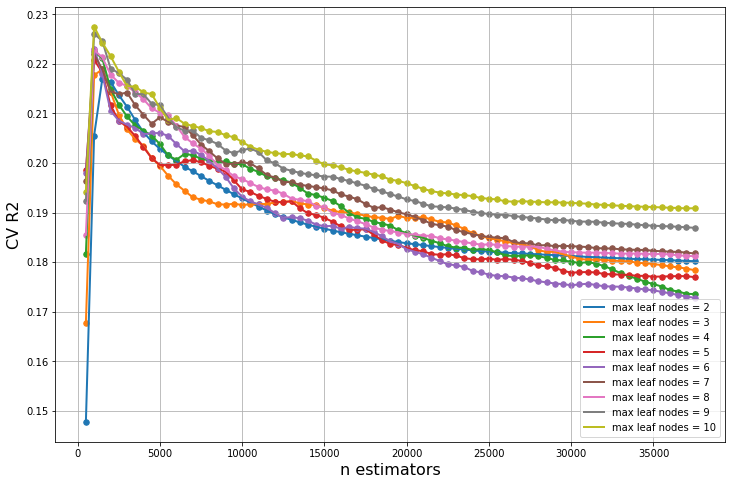

In [ ]:
plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.grid(True, which='both')

N = len(max_leaf_nodes)
M = len(n_estimators)
for i in range(N):
    plt.scatter(n_estimators, R2_array[:,i], s=30)
    plt.plot(n_estimators, R2_array[:,i], linewidth=2,
             label='max leaf nodes = '+str(max_leaf_nodes[i]))
plt.legend(loc='lower right')
plt.show()

In [ ]:
best_model_index = np.argmax(R2_array)
row_index = best_model_index//R2_array.shape[1]
col_index = best_model_index % R2_array.shape[1]
best_n_estimators = n_estimators[row_index]
best_max_leaf_nodes = max_leaf_nodes[col_index]
print('Best Model: n_estimator = %s, max_leaf_nodes = %s' %(best_n_estimators, best_max_leaf_nodes))

Best Model: n_estimator = 1000, max_leaf_nodes = 10


In [ ]:
gbr_cv = GradientBoostingRegressor(n_estimators = best_n_estimators, learning_rate = 0.005, max_depth = 20,
                                max_leaf_nodes=best_max_leaf_nodes, min_samples_leaf=10,random_state=99,verbose=0)
gbr_cv.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.005, max_depth=20, max_leaf_nodes=10,
                          min_samples_leaf=10, n_estimators=1000,
                          random_state=99)

In [ ]:
y_pred1 = gbr_cv.predict(X_test)
y_pred_boosting_cv = [0 if i < 0.5 else 1 for i in y_pred1]

In [ ]:
acc, TPR, FPR = perf(y_pred_boosting_cv)
print('Accuracy =', acc)
print('TPR =', TPR)
print('FPR =', FPR)

Accuracy = 0.675
TPR = 0.6455696202531646
FPR = 0.3076923076923077


Next, we built a boosting model by importing GradientBoostingRegressor from sklearn.ensemble. We set the learning_rate to 0.001, the min_samples_leaf to 10, and the max_depth to 10 so that it does not interfere with the tree-building process. Then, we got an accuracy of 0.665625, TPR of 0.620253164556962, and FPR of 0.3076923076923077. Since we set random values for n_estimators and max_leaf_nodes previously, we then used cross-validation to pick the best n_estimators and max_leaf_nodes. To increase the efficiency of the code, we looked up the algorithm in Lab 8 that manually implemented cross-validation and the model-building process simultaneously. After that, we visualized the performance of different values for the parameters. The best values are an n_estimator of 1000, and a max_leaf_nodes of 10. The performance of the cross-validated boosting model is an accuracy of 0.675, TPR of 0.6455696202531646, and FPR of 0.3076923076923077.

# Neural Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(88)

nn = Sequential()
nn.add(Dense(32, activation='relu', input_dim=8))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

nn.summary()
nn.fit(X_train_std, y_train, epochs=24, batch_size=60)

Model: "sequential_109"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 32)                288       
                                                                 
 dense_181 (Dense)           (None, 1)                 33        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/24
20/20 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5670
Epoch 2/24
20/20 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.5838
Epoch 3/24
20/20 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.5956
Epoch 4/24
20/20 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.6091
Epoch 5/24
20/20 [==============================] - 0s 2ms

In [ ]:
y_prob_nn = nn.predict(X_test_std)
y_pred_nn = [1 if x > 0.5 else 0 for x in y_prob_nn]

acc, TPR, FPR = perf(y_pred_nn)
print('Accuracy =', acc)
print('TPR =', TPR)
print('FPR =', FPR)

20/20 [==============================] - 0s 1ms/step
Accuracy = 0.696875
TPR = 0.5907172995780591
FPR = 0.24069478908188585


As the last attempt, we decided to try implementing a neural network, so we imported TensorFlow and Keras. To ensure reproducibility, we first set the TensorFlow random seed to 88. Then, we created an instance of the Sequential model. The first layer we added was a dense layer with 32 units, ReLU activation, and an input dimension of 8. The second layer we added was a dense layer with 1 unit and sigmoid activation. Then, we compiled the model with the Adam optimizer, binary cross-entropy as the loss function, and accuracy as the metrics. We also printed the summary of the model to examine its structure. After that, we fitted the model using the standardized X_train and the original y_train data and used it to predict test set probabilities using the standardized X_test data. Then, we calculate the corresponding predictions by using a classification threshold of 0.5 to maximize accuracy. After examining the model’s accuracy, TPR, and FPR, we went back to adjust the epochs and batch_size in the fitting step. We repeated this process several times until we got a satisfactory performance. The final epochs were set to 24 and batch_size was set to 60. We ended up with an accuracy of 0.696875, TPR of 0.5907172995780591, and FPR of 0.24069478908188585.